In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')


In [ ]:
df.shape

(212331, 15)

In [ ]:
df.shape

(212331, 15)

Explore data and column data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188512 entries, 0 to 212329
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   188512 non-null  object 
 1   School Name                  188512 non-null  object 
 2   School Level                 188512 non-null  object 
 3   Regents Exam                 188502 non-null  object 
 4   Year                         188512 non-null  object 
 5   Total Tested                 188512 non-null  int64  
 6   Mean Score                   133531 non-null  float64
 7   Number Scoring Below 65      133531 non-null  float64
 8   Percent Scoring Below 65     133531 non-null  float64
 9   Number Scoring 65 or Above   133531 non-null  float64
 10  Percent Scoring 65 or Above  133531 non-null  float64
 11  Number Scoring 80 or Above   133531 non-null  float64
 12  Percent Scoring 80 or Above  133531 non-null  float64
 13 

Convert Scores to Int Data types from string

In [ ]:
#changes all non standard missing values to standard missing values
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors = 'coerce')
#converts data type (Object)
df['Mean Score'] = df['Mean Score'].astype(float)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Number Scoring Below 65'] = pd.to_numeric(df['Number Scoring Below 65'], errors = 'coerce')
df['Number Scoring Below 65'] = df['Number Scoring Below 65'].astype(float)

In [ ]:
df['Percent Scoring Below 65'] = pd.to_numeric(df['Percent Scoring Below 65'], errors = 'coerce')
df['Percent Scoring Below 65'] = df['Percent Scoring Below 65'].astype(float)

In [ ]:
df['Number Scoring 65 or Above'] = pd.to_numeric(df['Number Scoring 65 or Above'], errors = 'coerce')
df['Number Scoring 65 or Above'] = df['Number Scoring 65 or Above'].astype(float)

In [ ]:
df['Percent Scoring 65 or Above'] = pd.to_numeric(df['Percent Scoring 65 or Above'], errors = 'coerce')
df['Percent Scoring 65 or Above'] = df['Percent Scoring 65 or Above'].astype(float)

In [ ]:
df['Number Scoring 80 or Above'] = pd.to_numeric(df['Number Scoring 80 or Above'], errors = 'coerce')
df['Number Scoring 80 or Above'] = df['Number Scoring 80 or Above'].astype(float)

In [ ]:
df['Percent Scoring 80 or Above'] = pd.to_numeric(df['Percent Scoring 80 or Above'], errors = 'coerce')
df['Percent Scoring 80 or Above'] = df['Percent Scoring 80 or Above'].astype(float)

In [ ]:
df['Number Scoring CR'] = pd.to_numeric(df['Number Scoring CR'], errors = 'coerce')
df['Number Scoring CR'] = df['Number Scoring CR'].astype(float)

In [ ]:
df['Percent Scoring CR'] = pd.to_numeric(df['Percent Scoring CR'], errors = 'coerce')
df['Percent Scoring CR'] = df['Percent Scoring CR'].astype(float)

In [ ]:
df['Year'] = df['Year'].astype(object)

In [ ]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Replaced all Non Standard values with 0
df.replace(np.NaN,0)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,0.0,0.0
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,0.0,0.0
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#After changing to numeric data types, run a describe to run analysis on all numeric columns
df.describe()

,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
count,212331.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,137109.000000,69651.000000,69651.000000
mean,49.364200,65.998967,25.140297,41.933632,46.443516,58.067855,20.506655,22.692027,29.959340,36.213730
std,93.023576,11.288883,37.155199,28.405737,85.187123,28.405517,56.301578,26.160987,68.306798,31.092605
min,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,58.300000,5.000000,17.500000,8.000000,36.000000,1.000000,2.200000,2.000000,8.800000
50%,20.000000,65.400000,13.000000,40.200000,21.000000,59.800000,5.000000,12.500000,9.000000,29.000000
75%,57.000000,73.400000,31.000000,64.000000,52.000000,82.500000,18.000000,34.500000,31.000000,58.800000
max,1729.000000,98.700000,697.000000,100.000000,1607.000000,100.000000,1365.000000,100.000000,1465.000000,100.000000


In [ ]:
#Subset created for Richmond Hill High School, the HS I attended.
RHHS = df[df['School DBN']== '27Q475']

In [ ]:
RHHS.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
14890,27Q475,Richmond Hill High School,High school,Geometry,2016,144,52.7,120.0,83.3,24.0,16.7,1.0,0.7,1.0,0.7
15163,27Q475,Richmond Hill High School,High school,Algebra2/Trigonometry,2015,110,44.5,92.0,83.6,18.0,16.4,8.0,7.3,8.0,7.3
15164,27Q475,Richmond Hill High School,High school,Algebra2/Trigonometry,2016,57,53.5,44.0,77.2,13.0,22.8,5.0,8.8,5.0,8.8
15165,27Q475,Richmond Hill High School,High school,Common Core Algebra,2015,194,58.7,124.0,63.9,70.0,36.1,3.0,1.5,50.0,25.8
15166,27Q475,Richmond Hill High School,High school,Common Core Algebra,2016,795,65.0,316.0,39.7,479.0,60.3,50.0,6.3,332.0,41.8


In [ ]:
#Obtain mean of percent scring above 80 for each RYear, by using the groupby function and added to another subset
RHHSG = RHHS.groupby(['Year'])['Percent Scoring 80 or Above'].mean()
print(RHHSG)

Year
2015    12.066418
2016    11.426619
2017    13.789623
Name: Percent Scoring 80 or Above, dtype: float64


In [ ]:
#Obtain mean for all schools by Year and add to another subset
AllSchoolsG= df.groupby(['Year'])['Percent Scoring 80 or Above'].mean()
print(AllSchoolsG)

Year
2015    20.827608
2016    22.521979
2017    25.004003
Name: Percent Scoring 80 or Above, dtype: float64


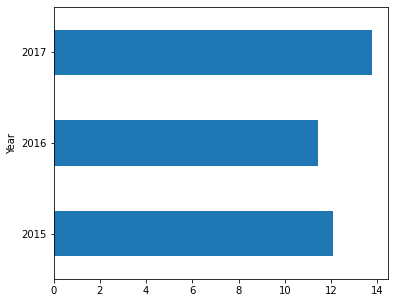

In [ ]:
#Created a bar chart of Richmond Hill High School
RHHSG.plot(kind='barh', ylabel= 'Avg Percent', xlabel='Year', figsize = (6,5))


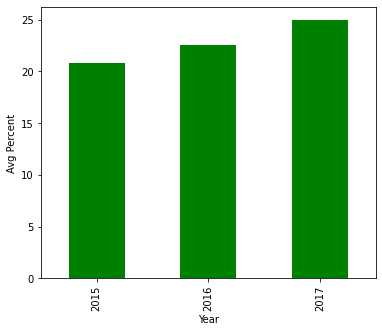

In [ ]:
#Created a bar chart for All Schools per year.
AllSchoolsG.plot(kind='bar', ylabel= 'Avg Percent', xlabel='Year', figsize = (6,5), color ='green')

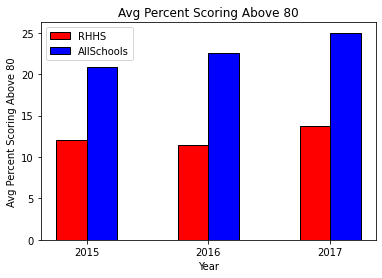

In [ ]:
#created a double bar chart to compare RHHS to all schools for those that scored over 80 using matplotlyb
Richmond_Hill_HS = RHHSG
AllSchools = AllSchoolsG

n = 3
r = np.arange(n)
width = 0.25

plt.bar(r,Richmond_Hill_HS, color= 'r', width= width, edgecolor = 'black', label = 'RHHS')
plt.bar(r + width, AllSchools, color = 'b', width= width, edgecolor = 'black', label = 'AllSchools')

plt.xlabel("Year")
plt.ylabel ("Avg Percent Scoring Above 80")
plt.title ("Avg Percent Scoring Above 80")

plt.xticks(r +width/2, ['2015', '2016', '2017'])
plt.legend()

plt.show()



---


According to the chart above, compared to all other schools, Richmond Hill High School had a lower percentage of students that scored above 80. All schools demonstrated an increase each year but Richmond Hill High School the percentage of students that scored above 80 dropped from 2015 to 2016. However, similar to all other schools, in 2017 the percentage of students that scored over 80 increased. 

---








